In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

In [42]:
ctl_s1 = pd.ExcelFile('./genecards_comparisons/ctl_s1_gc.xlsx')
s1_s2 = pd.ExcelFile('./genecards_comparisons/s1_s2_gc.xlsx')
s2_s3 = pd.ExcelFile('./genecards_comparisons/s2_s3_gc.xlsx')
s3_s4 = pd.ExcelFile('./genecards_comparisons/s3_s4_gc.xlsx')

In [43]:
ctl_s1_diseases = pd.read_excel(ctl_s1, 'Diseases', skiprows=18)
s1_s2_diseases = pd.read_excel(s1_s2, 'Diseases', skiprows=18)
s2_s3_diseases = pd.read_excel(s2_s3, 'Diseases', skiprows=18)
s3_s4_diseases = pd.read_excel(s3_s4, 'Diseases', skiprows=18)

# print(ctl_s1_pathways.columns)
print(ctl_s1_diseases.shape)

(6378, 11)


Include medium diseases

In [44]:

# filter ctl_s1_pathways to keep only pathways with SuperPath Score >= 19.69
ctl_s1_diseases= ctl_s1_diseases[ctl_s1_diseases['Score'] >= 19.69]
print(ctl_s1_diseases.shape)

# filter s1_s2_diseases to keep only pathways with SuperPath Score >= 4.56
s1_s2_diseases = s1_s2_diseases[s1_s2_diseases['Score'] >= 4.56]
print(s1_s2_diseases.shape)

# filter s2_s3_diseases to keep only pathways with SUperPath Score >= 14.68
s2_s3_diseases = s2_s3_diseases[s2_s3_diseases['Score'] >= 14.68]
print(s2_s3_diseases.shape)

# filter s3_s4_diseases to keep only pathways with SuperPath Score >= 11.29
s3_s4_diseases = s3_s4_diseases[s3_s4_diseases['Score'] >= 11.29]
print(s3_s4_diseases.shape)

(54, 11)
(30, 11)
(46, 11)
(77, 11)


Only high diseases

In [45]:

# # filter ctl_s1_pathways to keep only pathways with SuperPath Score >= 42.87
# ctl_s1_diseases= ctl_s1_diseases[ctl_s1_diseases['Score'] >= 42.87]
# print(ctl_s1_diseases.shape)

# # filter s1_s2_diseases to keep only pathways with SuperPath Score >= 9.40
# s1_s2_diseases = s1_s2_diseases[s1_s2_diseases['Score'] >= 9.40]
# print(s1_s2_diseases.shape)

# # filter s2_s3_diseases to keep only pathways with SUperPath Score >= 29.92
# s2_s3_diseases = s2_s3_diseases[s2_s3_diseases['Score'] >= 29.92]
# print(s2_s3_diseases.shape)

# # filter s3_s4_diseases to keep only pathways with SuperPath Score >= 22.86
# s3_s4_diseases = s3_s4_diseases[s3_s4_diseases['Score'] >= 22.86]
# print(s3_s4_diseases.shape)

In [46]:
# Create union of all unique pathways
pathways = pd.concat([ctl_s1_diseases, s1_s2_diseases, s2_s3_diseases, s3_s4_diseases])
pathways = pathways.drop_duplicates(subset='Name')

In [47]:
# Create binary matrix table of what pathways are present in each comparison
pathway_matrix = pd.DataFrame(index=pathways['Name'])
pathway_matrix['ctl_s1'] = 0
pathway_matrix['s1_s2'] = 0
pathway_matrix['s2_s3'] = 0
pathway_matrix['s3_s4'] = 0

for index, row in pathways.iterrows():
    pathway = row['Name']
    if pathway in ctl_s1_diseases['Name'].values:
        pathway_matrix.at[pathway, 'ctl_s1'] = 1
    if pathway in s1_s2_diseases['Name'].values:
        pathway_matrix.at[pathway, 's1_s2'] = 1
    if pathway in s2_s3_diseases['Name'].values:
        pathway_matrix.at[pathway, 's2_s3'] = 1
    if pathway in s3_s4_diseases['Name'].values:
        pathway_matrix.at[pathway, 's3_s4'] = 1

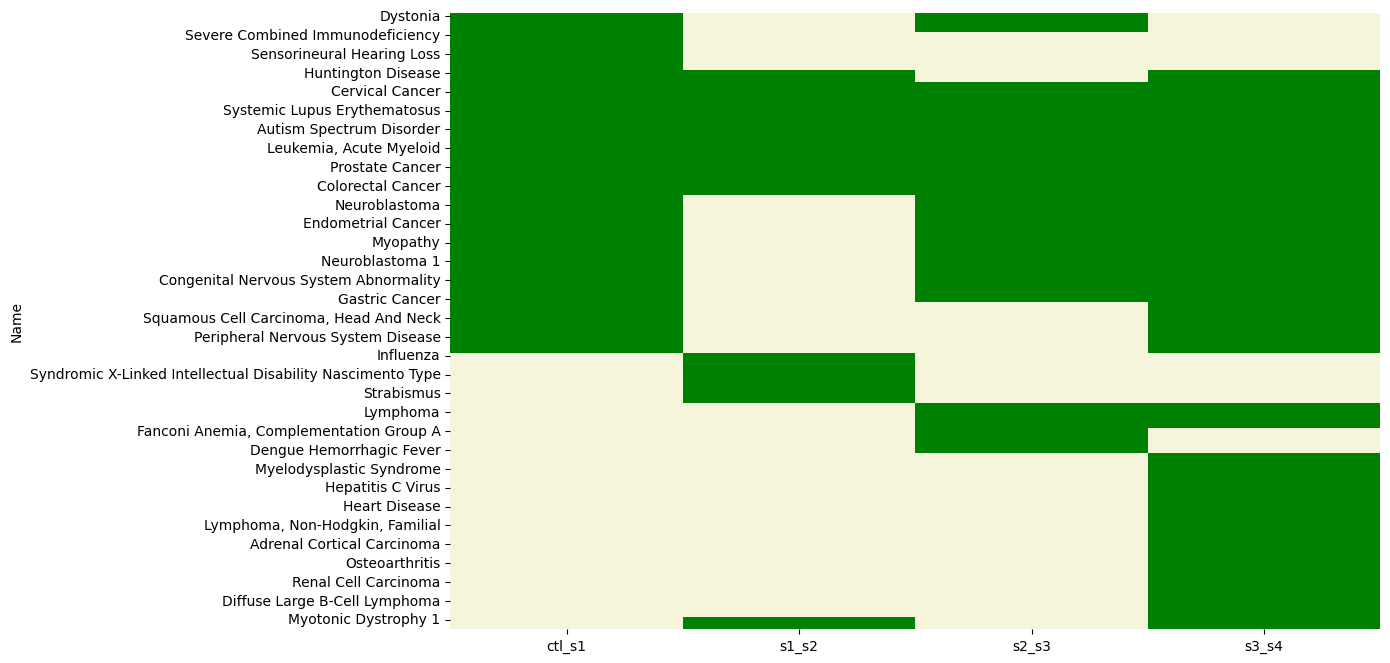

In [48]:
# Clustering
linkage_matrix = linkage(pathway_matrix, method='average', metric='euclidean')

# Extract the order of pathways after clustering
ordered_index = leaves_list(linkage_matrix)
ordered_pathway_matrix = pathway_matrix.iloc[ordered_index]

# Save the ordered matrix to Excel
ordered_pathway_matrix.to_excel('./genecards_comparisons/disease_matrix_clustered.xlsx')

# Optional: Plot heatmap with the new order
plt.figure(figsize=(12, 8))
sns.heatmap(ordered_pathway_matrix, cmap=['beige', 'green'], cbar=False)
plt.show()